In [1]:
# 載入 Mnist 資料集

from tensorflow.keras.datasets.mnist import load_data

((x_train, y_train), (x_test, y_test)) = load_data()

In [2]:
# 看資料的結構

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
# 取第一筆

import pandas as pd

one = pd.DataFrame(x_train[0])
# one

這個是: 5


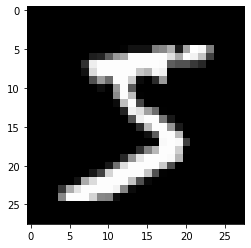

In [4]:
# 看第一筆

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap="gray")
print("這個是:", y_train[0])

In [5]:
# 搭蛋糕 (Sequential) 骨架

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 28x28 = 784
model.add(Dense(64, activation="relu", input_dim=784))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 優化模型

from tensorflow.keras.losses import CategoricalCrossentropy

# CategoricalCrossentropy = 亂度距離 (類似 MSE 的東西)
# adam = 亞當優化器XD

model.compile(loss=CategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [7]:
# 資料預處理

# to_categorical = one-hot encode
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print("原本答案:", y_train[0])
print("轉換成機率表示法:", y_train_cat[0])

原本答案: 5
轉換成機率表示法: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# 標準化
# 因為 "relu" 喜歡 0-1, 所以 0-255 -> 0-1
# 普通的list不能這樣除，要用nparray。

# -1 = 自動計算。 -> 這邊 = 60000筆資料。
# 正常寫法: x_train_norm = x_train.reshape(60000, 784) / 255
x_train_norm = x_train.reshape(-1, 784) / 255

# (784, 1), 這個 1 不可以打，會錯誤。
x_test_norm = x_test.reshape(-1, 784) / 255

In [9]:
# 看到 fit = 模型真正運作的區域
# 所以你的參數都要寫在這欄的上面

# 隨機梯度下降

# batch_size = 每看 200 筆執行乙次梯度下降
# validation_split = 從 x_train_norm 切成 9:1 產生驗證
# epochs = 整份資料 (60000筆 * 0.9) 看 20 遍

model.fit(x_train_norm,
          y_train_cat,
          batch_size=100,
          validation_split=0.1,
          epochs=20,
          verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 - 1s - loss: 0.4192 - accuracy: 0.8860 - val_loss: 0.2015 - val_accuracy: 0.9448
Epoch 2/20
54000/54000 - 1s - loss: 0.2084 - accuracy: 0.9399 - val_loss: 0.1510 - val_accuracy: 0.9583
Epoch 3/20
54000/54000 - 1s - loss: 0.1576 - accuracy: 0.9541 - val_loss: 0.1240 - val_accuracy: 0.9642
Epoch 4/20
54000/54000 - 1s - loss: 0.1276 - accuracy: 0.9620 - val_loss: 0.1129 - val_accuracy: 0.9688
Epoch 5/20
54000/54000 - 1s - loss: 0.1074 - accuracy: 0.9688 - val_loss: 0.1010 - val_accuracy: 0.9708
Epoch 6/20
54000/54000 - 1s - loss: 0.0926 - accuracy: 0.9726 - val_loss: 0.0948 - val_accuracy: 0.9742
Epoch 7/20
54000/54000 - 1s - loss: 0.0812 - accuracy: 0.9760 - val_loss: 0.0937 - val_accuracy: 0.9735
Epoch 8/20
54000/54000 - 1s - loss: 0.0703 - accuracy: 0.9792 - val_loss: 0.0881 - val_accuracy: 0.9752
Epoch 9/20
54000/54000 - 1s - loss: 0.0622 - accuracy: 0.9819 - val_loss: 0.0891 - val_accuracy: 0.9733
Epoch 10/20
540

In [10]:
# 算模型的整體預測率
# verbose=2 -> 關掉進度條

model.evaluate(x_test_norm, y_test_cat, verbose=2)

10000/1 - 0s - loss: 0.0450 - accuracy: 0.9744


[0.08988703712506685, 0.9744]

In [11]:
# model.predict = 顯示機率值
# model.predict_classes = 顯示預測類別

pre = model.predict_classes(x_test_norm)
pre

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [12]:
# 混淆矩陣
# (y_true, y_pred) -> 一定要放對

import pandas as pd
from sklearn.metrics import confusion_matrix

columns = ["{}(預測)".format(i) for i in range(10)]


pd.DataFrame(confusion_matrix(y_test, pre), columns=columns)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0,969,0,2,0,0,1,4,1,3,0
1,0,1119,3,3,0,1,2,1,6,0
2,6,2,993,7,4,0,3,8,8,1
3,0,0,4,982,0,8,0,6,4,6
4,1,0,2,0,953,1,6,4,2,13
5,2,0,0,7,0,874,3,1,4,1
6,5,3,1,1,2,9,934,1,2,0
7,2,4,8,6,0,1,0,997,2,8
8,4,0,1,5,4,6,3,3,944,4
9,3,2,0,6,8,3,1,3,4,979


In [13]:
# np.array才有的特殊操作

import numpy as np
npnonZero = np.nonzero(pre != y_test)
pdnonZero = pd.DataFrame(npnonZero)

# npnonZero
# pdnonZero

In [14]:
# 看總共錯了幾個

idx = npnonZero[0]
len(idx)

256

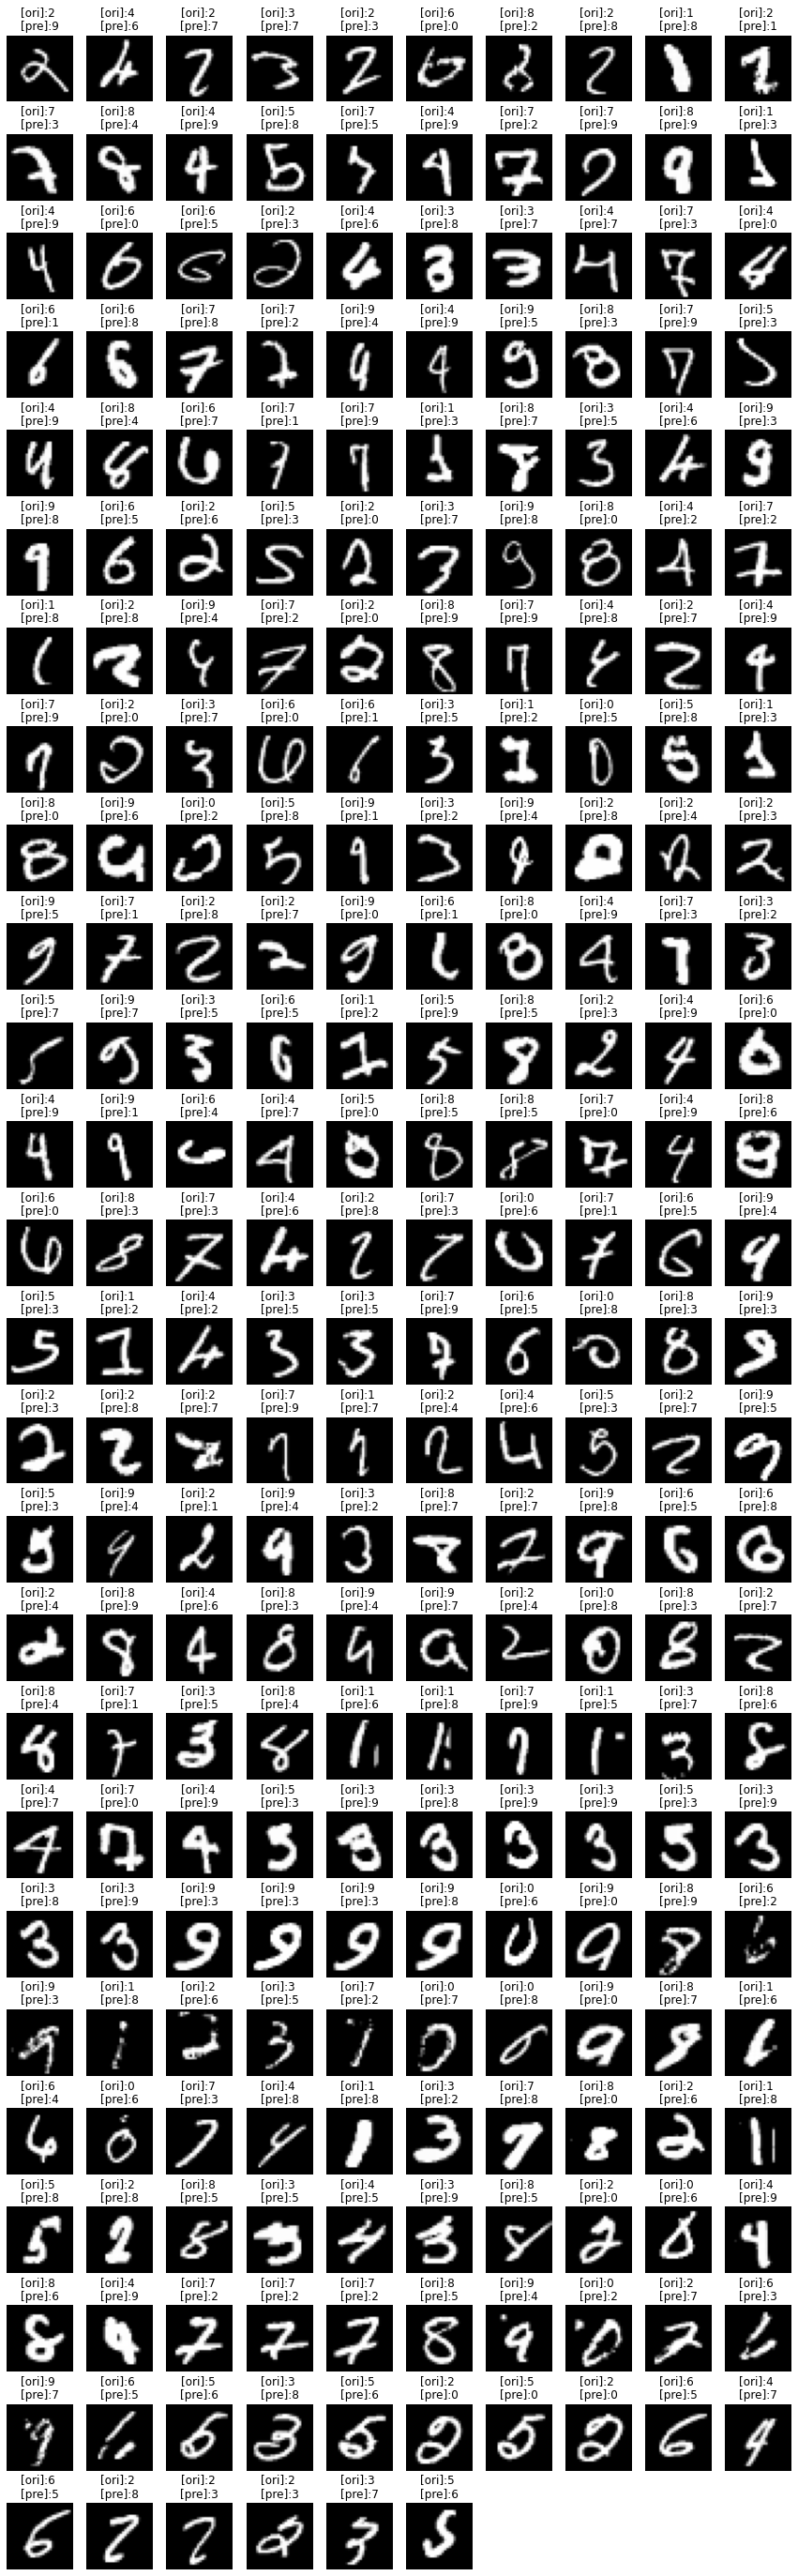

In [15]:
# 做分割大圖

idx = npnonZero[0]  # 錯誤辨識的標籤號

false_img = x_test[idx]  #錯誤辨識 原本的圖 
false_answer = y_test[idx]  #錯誤預測的 正確答案
false_false_num = pre[idx]  #錯誤預測的 錯誤答案

# 圖的寬高
width = 10
height = len(false_img) // width + 1  # // = 拿到整數的部分

plt.figure(figsize=(15, 50))

for (i, img) in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    plt.axis("off")
    
    title = "[ori]:{} \n[pre]:{}".format(false_answer[i], false_false_num[i])
    plt.title(title)
    
    plt.imshow(img, cmap="gray")

請給檔案路徑:C:\Users\User\Desktop\5555.png
模型認為是: 5


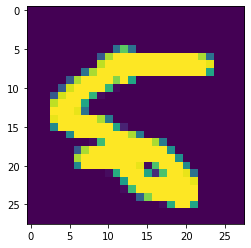

In [16]:
# API
# 記得安裝 pillow

from tensorflow.keras.preprocessing.image import load_img

fn = input("請給檔案路徑:")

# 檔案 = pillow image = RGB
# pillow image 可以 轉換成灰階 ("L")
img = load_img(fn, target_size=(28, 28)).convert("L")

# 轉換成 np.array
# x_test.reshape(10000, 784) 
# point: .reshape(784) != .reshape(1, 784)

img_norm = np.array(img).reshape(1, 784) / 255

pre_answer = model.predict_classes(img_norm)[0]
print("模型認為是:", pre_answer)

plt.imshow(img)